In [2]:
import numpy as np
import pandas as pd
import re

In [70]:
file = open("luckBhaskar.srt", "r")
words = ""
line_count = sum(1 for _ in file)
file.seek(0)
for _ in range(int(line_count)):
    line = re.findall(r"[a-zA-Z]+", file.readline())
    for word in line:
        words += word.lower() + " "
words
file.close()

In [16]:
len(words.split())

15556

In [20]:
import requests, zipfile, io, os

In [56]:
def get_movie_words(url):
    response = requests.get(url)
    # print(response.headers)
    filename = url.split("/")[-1]
    if response.status_code == 200:
        with open(filename, "wb") as file:
            file.write(response.content)
        # print("Found SRT file:", filename)

        file = open(filename, "r")
        words = ""
        line_count = sum(1 for _ in file)
        file.seek(0)
        for _ in range(int(line_count)):
            line = re.findall(r"[a-zA-Z]+", file.readline())
            for word in line:
                words += word.lower() + " "
        return words

In [58]:
words = get_movie_words(
    "https://www.subtitlecat.com/subs/12/www.TamilRockers.gr%20-%20Rangasthalam%20(2018)[Telugu%20HQ%20Real%20DVDScr%20-%20x264%20-%20HQ%20Line%20Audio%20-%20400MB]-en.srt"
)
print(len(words.split()), words)

5511 advertise your product or brand here contact www opensubtitles org today don t look now but look look look look look okay i just watched that and i think i m pregnant and he s walking over god it s bronwyn what it s almost don t answer it i have to yes just hang on one second can you say that again that prick oliver threw a fit so they bumped up the meeting we re presenting tomorrow which means i need to get back tonight and you re rebooking your flight out of newark my god you re serious what is that music you re not out on a tuesday are you no no i um you hate newark almost as much as i hate oliver but the meeting s moved which means i need a flight hang on here s my cab call when you get this fixed i m sorry i wasn t avoiding you earlier it s my boss she s a bitch synced and corrected by robtor www addic ed com found it we got what we came for finish them off the police are wrong they think some ex con named navarro killed tom he didn t paris i d like you to meet elizabeth pari

In [37]:
df = pd.DataFrame()

In [59]:
df["name"] = [
    "Lucky Baskhar",
    "Rangasthalam",
    "Evaru",
    "Agent Sai Srinivasa Athreya",
    "Hit",
    "Hi Nanna",
    "Oopiri",
    "Pushpa 1",
    "Salaar 1",
    "Jersey",
]
df["genre"] = [
    ["Crime", "Drama", "Thriller"],
    ["Action", "Drama"],
    ["Mystery", "Thriller"],
    ["Comedy", "Crime", "Mystery"],
    ["Crime", "Drama", "Mystery"],
    ["Drama", "Family", "Romance"],
    ["Comedy", "Drama"],
    ["Action", "Crime", "Drama"],
    ["Action", "Crime", "Drama"],
    ["Drama", "Sport"],
]

df

,name,genre,dialogues
0,Lucky Baskhar,"[Crime, Drama, Thriller]",None
1,Rangasthalam,"[Action, Drama]",None
2,Evaru,"[Mystery, Thriller]",None
3,Agent Sai Srinivasa Athreya,"[Comedy, Crime, Mystery]",None
4,Hit,"[Crime, Drama, Mystery]",None
5,Hi Nanna,"[Drama, Family, Romance]",None
6,Oopiri,"[Comedy, Drama]",None
7,Pushpa 1,"[Action, Crime, Drama]",None
8,Salaar 1,"[Action, Crime, Drama]",None
9,Jersey,"[Drama, Sport]",None


In [49]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df["genre"])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

df_2 = pd.concat([df.drop(columns=["genre"]), genre_df], axis=1)
df_2

,name,Action,Comedy,Crime,Drama,Family,Mystery,Romance,Sport,Thriller
0,Lucky Bhaskar,0,0,1,1,0,0,0,0,1
1,Rangasthalam,1,0,0,1,0,0,0,0,0
2,Evaru,0,0,0,0,0,1,0,0,1
3,Agent Sai Srinivasa Athreya,0,1,1,0,0,1,0,0,0
4,Hit,0,0,1,1,0,1,0,0,0
5,Hi Nanna,0,0,0,1,1,0,1,0,0
6,Oopiri,0,1,0,1,0,0,0,0,0
7,Pushpa 1,1,0,1,1,0,0,0,0,0
8,Salaar 1,1,0,1,1,0,0,0,0,0
9,Jersey,0,0,0,1,0,0,0,1,0


In [53]:
df["dialogues"] = None
df

,name,genre,dialogues
0,Lucky Bhaskar,"[Crime, Drama, Thriller]",None
1,Rangasthalam,"[Action, Drama]",None
2,Evaru,"[Mystery, Thriller]",None
3,Agent Sai Srinivasa Athreya,"[Comedy, Crime, Mystery]",None
4,Hit,"[Crime, Drama, Mystery]",None
5,Hi Nanna,"[Drama, Family, Romance]",None
6,Oopiri,"[Comedy, Drama]",None
7,Pushpa 1,"[Action, Crime, Drama]",None
8,Salaar 1,"[Action, Crime, Drama]",None
9,Jersey,"[Drama, Sport]",None


In [103]:
import requests
import zipfile
import io
import os
import re
import shutil  # For removing folders


def get_movie_words_zip(url):
    response = requests.get(url)

    if response.status_code == 200:
        extract_path = "extracted_srt"

        # Remove and recreate directory to avoid stale files
        if os.path.exists(extract_path):
            shutil.rmtree(extract_path)
        os.makedirs(extract_path)

        # Extract new ZIP file
        with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
            zip_file.extractall(extract_path)

        words = []
        for file_name in os.listdir(extract_path):
            if file_name.endswith(".srt"):
                srt_path = os.path.join(extract_path, file_name)
                print("Found SRT file:", srt_path)

                with open(srt_path, "r", encoding="utf-8") as file:
                    for line in file:
                        # Remove timestamps and numbers
                        line = re.sub(r"\d+[:.,]?\d*[:.,]?\d*", "", line)

                        # Extract meaningful words
                        clean_words = re.findall(r"[a-zA-Z]+", line.lower())
                        words.extend(clean_words)

                return " ".join(words)  # Properly remove extra spaces

    else:
        print("Error: Request failed with status code", response.status_code)
        return None

In [118]:
words = get_movie_words_zip("https://dl.opensubtitles.org/en/download/sub/12076827")
print(words)
print(len(words.split()))

df.iloc[9,-1] = words

Found SRT file: extracted_srt\Jersey (2019) Telugu WEB-DL.srt
watch online movies and series for free www osdb link lm we might take the right path but that might turn out to be the dangerous one we might start the journey for dear ones but it might end up in the middle the weeping of your loved ones doesn t get you back no one can replace you in our hearts this is our request to help you stay away from anguish beware while traveling on the road the destination of your travel should be your home we hope that it is nothing else hello how are you hi i m good do they have it no do you have any more copies of jersey i just sold the lost copy i m sorry okay let s come back later come on this is all your fault you didn t let me pre order look what happened online order also takes days to reach i ve been waiting for a long time why are you so desperate to read that book hello excuse me hi i guess you re looking for this book did we ask for this what were you doing stalking us you re just wait

In [119]:
df

,name,genre,dialogues
0,Lucky Baskhar,"[Crime, Drama, Thriller]",advertise your product or brand here contact w...
1,Rangasthalam,"[Action, Drama]",hd movie in mb mb p p mehedybd com this story ...
2,Evaru,"[Mystery, Thriller]",english subtitles hi parts removed advertise y...
3,Agent Sai Srinivasa Athreya,"[Comedy, Crime, Mystery]",watch online movies and series for free www os...
4,Hit,"[Crime, Drama, Mystery]",watch online movies and series for free www os...
5,Hi Nanna,"[Drama, Family, Romance]",watch online movies and series for free www os...
6,Oopiri,"[Comedy, Drama]",watch any video online with open subtitles fre...
7,Pushpa 1,"[Action, Crime, Drama]",support us and become vip member to remove all...
8,Salaar 1,"[Action, Crime, Drama]",watch any video online with open subtitles fre...
9,Jersey,"[Drama, Sport]",watch online movies and series for free www os...


In [129]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
embedding = cv.fit_transform(df["dialogues"]).toarray()
embeddings = embedding.astype("float64")
embeddings.shape

(10, 6853)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=9)
z = tsne.fit_transform(embeddings)

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.001s...
[t-SNE] Computed neighbors for 10 samples in 0.174s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 3592.429647
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.511555
[t-SNE] KL divergence after 1000 iterations: 0.251817


In [132]:
z.shape

(10, 2)

In [138]:
df_2['z2'] = z.T[1]


In [139]:
df_2

,name,Action,Comedy,Crime,Drama,Family,Mystery,Romance,Sport,Thriller,z1,z2
0,Lucky Bhaskar,0,0,1,1,0,0,0,0,1,-55.985817,-8.885222
1,Rangasthalam,1,0,0,1,0,0,0,0,0,42.159332,-50.910439
2,Evaru,0,0,0,0,0,1,0,0,1,-6.333630,-27.814877
3,Agent Sai Srinivasa Athreya,0,1,1,0,0,1,0,0,0,-10.775688,63.235836
4,Hit,0,0,1,1,0,1,0,0,0,-8.716075,15.111178
5,Hi Nanna,0,0,0,1,1,0,1,0,0,40.572727,-3.984644
6,Oopiri,0,1,0,1,0,0,0,0,0,37.002678,42.706234
7,Pushpa 1,1,0,1,1,0,0,0,0,0,-56.452457,38.180119
8,Salaar 1,1,0,1,1,0,0,0,0,0,-3.548020,-75.837708
9,Jersey,0,0,0,1,0,0,0,1,0,-51.555042,-55.734882


In [140]:
!pip install plotly

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 645.7 kB/s eta 0:00:23
   - -------------------------------------- 0.5/14.8 MB 645.7 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/14.8 MB 633.2 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/14.8 MB 633.2 kB/s eta 0:00:23
   -- ------------------------------------- 1.0/14.8 MB 680.3 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/14.8 MB 680.3 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/14.8 MB 680.3 kB/s eta 0:00:21
   --- ------------------------------------ 1.3/14.8 MB 588.8 kB/s eta 0:00:23
   --- ------------------------------------ 1.3/14.8 MB 588.8 kB/s eta 0:00:23
   ---- -

DEPRECATION: Loading egg at c:\users\nithi\appdata\local\programs\python\python311\lib\site-packages\parse_torrent_name-1.1.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


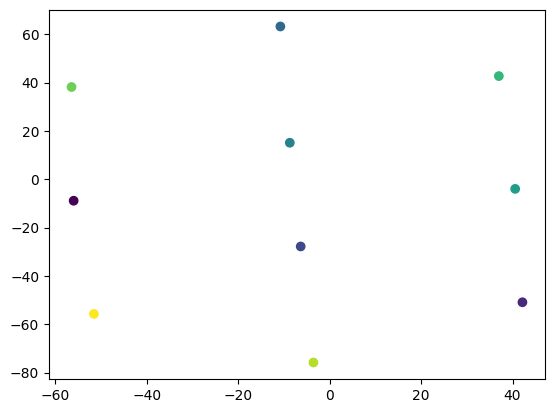

In [147]:
import matplotlib.pyplot as plt
fig = plt.scatter(df_2["z1"], df_2["z2"], c=pd.factorize(df_2["name"])[0])


In [150]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_2['z1'] = scaler.fit_transform(df_2[["z1"]])
df_2["z2"] = scaler.fit_transform(df_2[["z2"]])

In [151]:
df_2

,name,Action,Comedy,Crime,Drama,Family,Mystery,Romance,Sport,Thriller,z1,z2
0,Lucky Bhaskar,0,0,1,1,0,0,0,0,1,0.004732,0.481418
1,Rangasthalam,1,0,0,1,0,0,0,0,0,1.000000,0.179238
2,Evaru,0,0,0,0,0,1,0,0,1,0.508244,0.345305
3,Agent Sai Srinivasa Athreya,0,1,1,0,0,1,0,0,0,0.463198,1.000000
4,Hit,0,0,1,1,0,1,0,0,0,0.484084,0.653962
5,Hi Nanna,0,0,0,1,1,0,1,0,0,0.983911,0.516655
6,Oopiri,0,1,0,1,0,0,0,0,0,0.947708,0.852383
7,Pushpa 1,1,0,1,1,0,0,0,0,0,0.000000,0.819838
8,Salaar 1,1,0,1,1,0,0,0,0,0,0.536492,0.000000
9,Jersey,0,0,0,1,0,0,0,1,0,0.049664,0.144548


In [152]:
from scipy.spatial.distance import euclidean, hamming

categorical_weight = 1.0
numerical_weight = 2.0


def weighted_distance(movie1, movie2):
    cat_dist = (
        hamming(movie1[:-2], movie2[:-2]) * categorical_weight
    )  # Categorical part
    num_dist = euclidean(movie1[-2:], movie2[-2:]) * numerical_weight  # Numerical part
    return cat_dist + num_dist

In [166]:
df_2

,name,Action,Comedy,Crime,Drama,Family,Mystery,Romance,Sport,Thriller,z1,z2
0,Lucky Bhaskar,0,0,1,1,0,0,0,0,1,0.004732,0.481418
1,Rangasthalam,1,0,0,1,0,0,0,0,0,1.000000,0.179238
2,Evaru,0,0,0,0,0,1,0,0,1,0.508244,0.345305
3,Agent Sai Srinivasa Athreya,0,1,1,0,0,1,0,0,0,0.463198,1.000000
4,Hit,0,0,1,1,0,1,0,0,0,0.484084,0.653962
5,Hi Nanna,0,0,0,1,1,0,1,0,0,0.983911,0.516655
6,Oopiri,0,1,0,1,0,0,0,0,0,0.947708,0.852383
7,Pushpa 1,1,0,1,1,0,0,0,0,0,0.000000,0.819838
8,Salaar 1,1,0,1,1,0,0,0,0,0,0.536492,0.000000
9,Jersey,0,0,0,1,0,0,0,1,0,0.049664,0.144548


In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=2, metric=weighted_distance)
knn.fit(df_2.iloc[:,1:])
distances, indices = knn.kneighbors([df_2.iloc[8, 1:].values])
recommended_indices = indices[0][1:]
recommended_indices

c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array([1], dtype=int64)